## 📌 Task 1: Getting Started with Kaggle


## 📌 Task 2: Exploratory Data Analysis (EDA)

### Importing Libraries

In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas_profiling 
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import the dataset


In [103]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [104]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [105]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

### Data visualization


In [106]:
#Pandas Profiling Report
report = pp.ProfileReport(train)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Variable Notes**

_pclass_: A proxy for socio-economic status (SES)
- _1st_ = Upper
- _2nd_ = Middle
- _3rd_ = Lower

_age_: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

_sibsp_: The dataset defines family relations in this way...
- _Sibling_ = brother, sister, stepbrother, stepsister
- _Spouse_ = husband, wife (mistresses and fiancés were ignored)

_parch_: The dataset defines family relations in this way...
- _Parent_ = mother, father
- _Child_ = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 📌 Task 2: Exploratory Data Analysis (EDA)

After visualized our entire dataset, **check the describe above or the Sample in our dataframe report**, you see that there are certain data points labeled with a `NaN`. These denote missing values. Different datasets encode missing values in different ways. Sometimes it may be a `9999`, other times a`0` - because real world data can be very messy!


**The goal here is to figure out how best to process the data so our machine learning model can learn from it.**

### Preprocessing

**Look at numeric and categorical values separately:**

Numerical Features: Age, Fare, SibSp, Parch.

Categorical Features: Survived, Sex, Embarked, Pclass.

Alphanumeric Features (but categorical): Ticket, Cabin.

In our overview report, click on the tab "Warnings": 

- Tickets and Cabin are features with a high cardinality, and a lot of distinc values. 
- Age and Cabin has a lot of missing values.
- Name and ID has unique values.
- SibSp, Parch and Fare has a lot of zeros. 

In [107]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**How many people survived?**

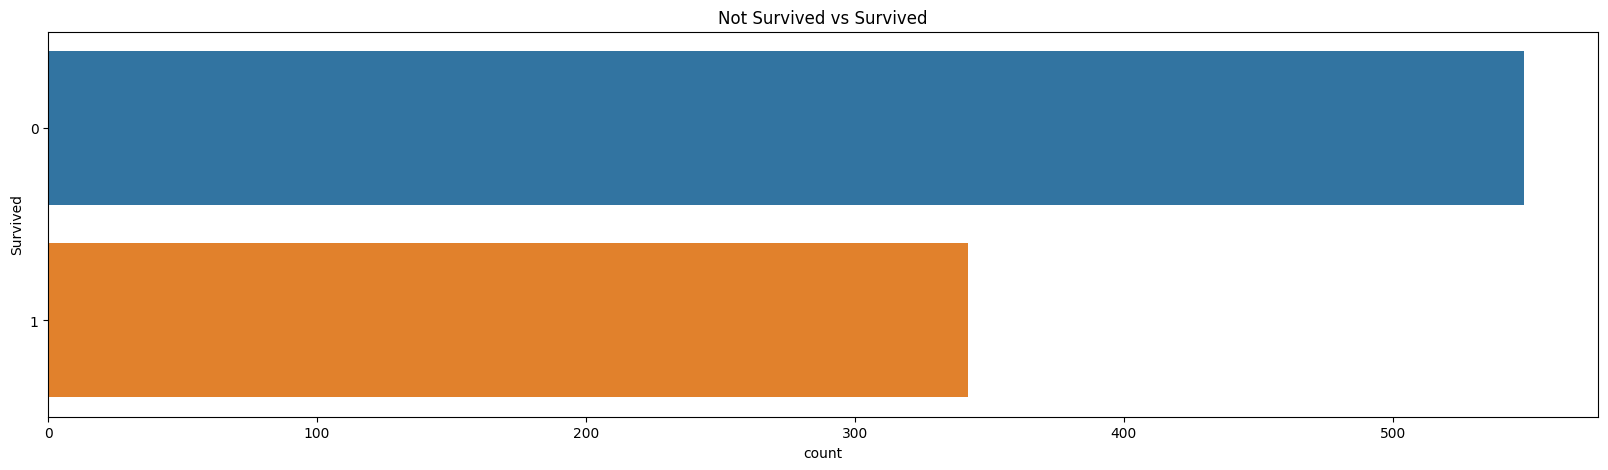

In [108]:
plt.figure(figsize=(20,5))
sns.countplot(y='Survived',data=train)
plt.title("Not Survived vs Survived")
plt.show()

**Feature Name**

In [109]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

**Feature Age**

<Axes: xlabel='Survived', ylabel='Age'>

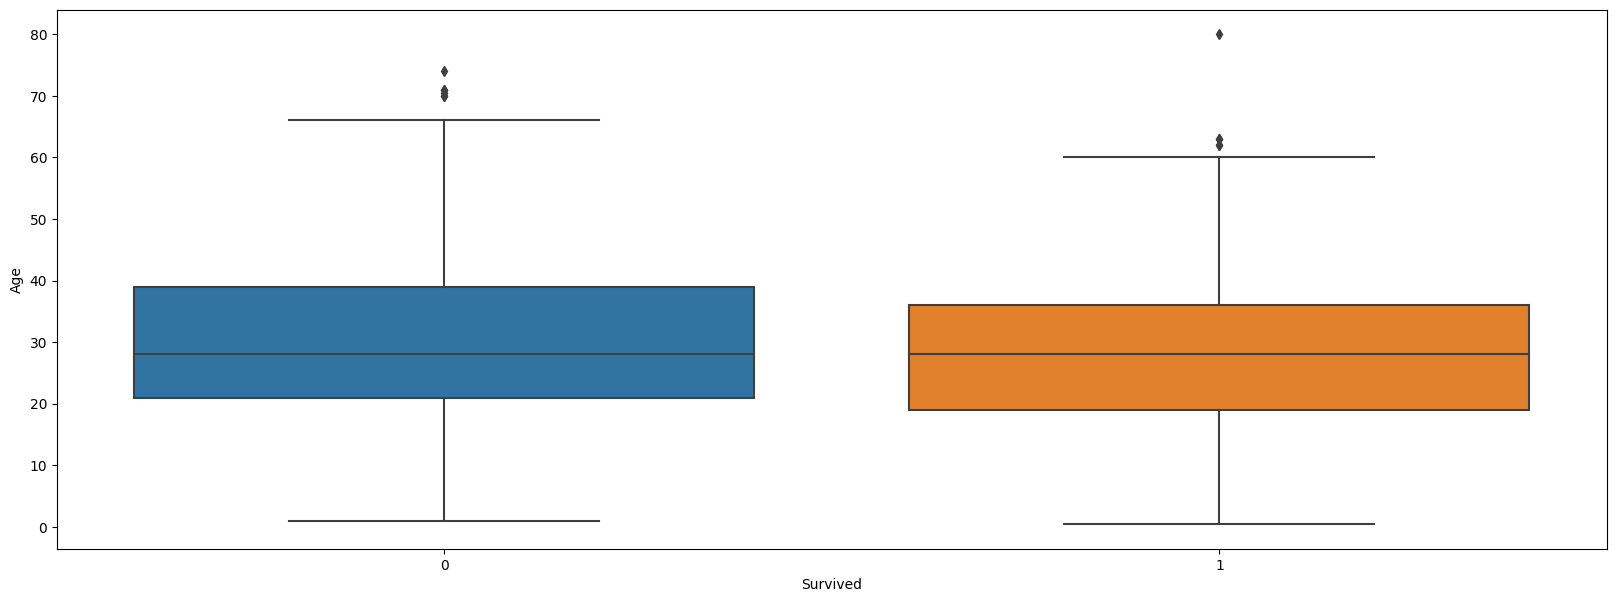

In [110]:
plt.figure(figsize=(20,7))
sns.boxplot(x="Survived",y="Age",data=train)

**Feature Ticket**

In [111]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

**Feature Cabin**

In [112]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [113]:
train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

## 📌 Task 4: Preprocessing II

**Feature Embarked**

<Axes: xlabel='count', ylabel='Embarked'>

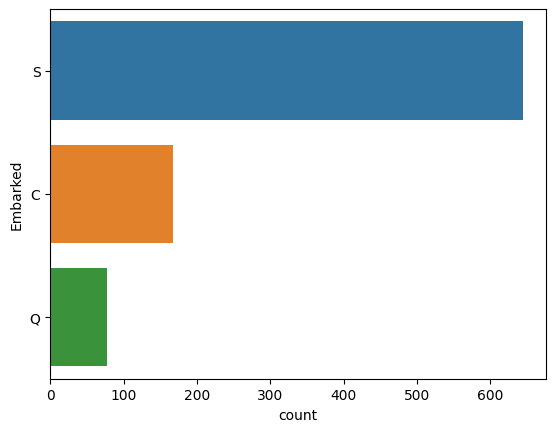

In [114]:
sns.countplot(y='Embarked',data=train)

In [115]:
train=train.dropna(subset=['Embarked'])

**Feature Sex**

<Axes: xlabel='count', ylabel='Sex'>

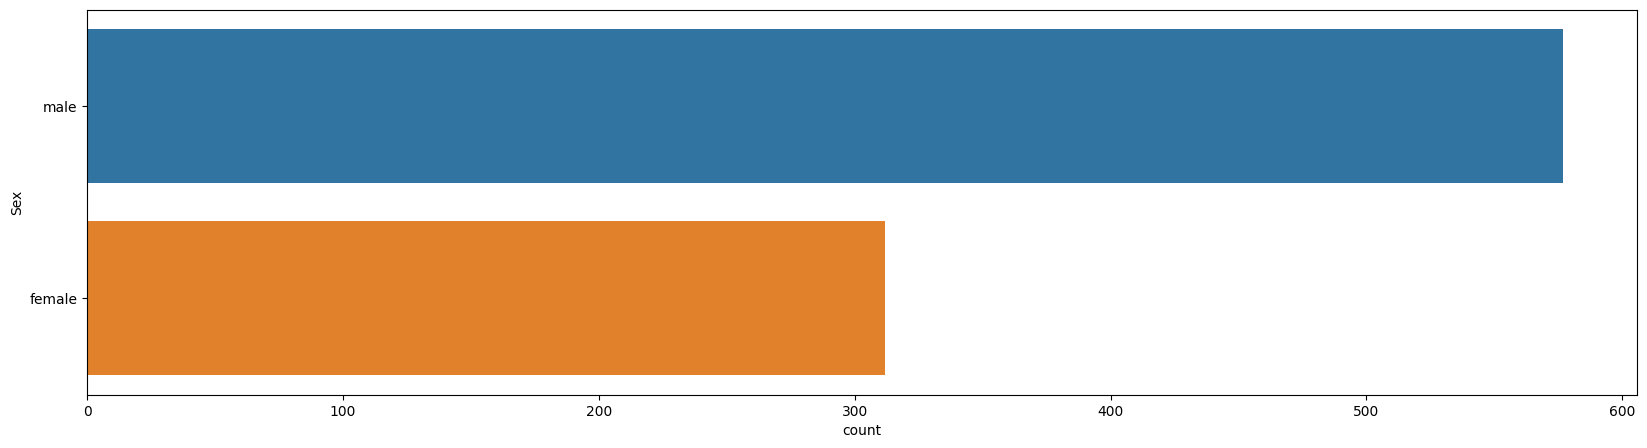

In [116]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sex',data=train)

In [117]:
train['Sex']=np.where(train['Sex'] == 'female',1,0)
test['Sex']=np.where(test['Sex'] == 'female',1,0)

In [118]:
train.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Embarked
0            1         0       3    0      1      0   7.2500        S
1            2         1       1    1      1      0  71.2833        C
2            3         1       3    1      0      0   7.9250        S
3            4         1       1    1      1      0  53.1000        S
4            5         0       3    0      0      0   8.0500        S

## 📌 Task 5: Preprocessing III


### Feature Encoding
**Train Dataset**

In [119]:
embarked_oh = pd.get_dummies(train["Embarked"],prefix='embarked')
sex_oh = pd.get_dummies(train["Sex"],prefix='sex')
pclass_oh = pd.get_dummies(train["Pclass"],prefix='pclass')

In [120]:
df_encoded = pd.concat([train,embarked_oh,sex_oh,pclass_oh],axis=1)
df_encoded.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Embarked  \
0            1         0       3    0      1      0   7.2500        S   
1            2         1       1    1      1      0  71.2833        C   
2            3         1       3    1      0      0   7.9250        S   
3            4         1       1    1      1      0  53.1000        S   
4            5         0       3    0      0      0   8.0500        S   

   embarked_C  embarked_Q  embarked_S  sex_0  sex_1  pclass_1  pclass_2  \
0           0           0           1      1      0         0         0   
1           1           0           0      0      1         1         0   
2           0           0           1      0      1         0         0   
3           0           0           1      0      1         1         0   
4           0           0           1      1      0         0         0   

   pclass_3  
0         1  
1         0  
2         1  
3         0  
4         1

In [121]:
df_encoded=df_encoded.drop(['Pclass','Sex','Embarked'],axis=1)
df_encoded.head()

PassengerId  Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  \
0            1         0      1      0   7.2500           0           0   
1            2         1      1      0  71.2833           1           0   
2            3         1      0      0   7.9250           0           0   
3            4         1      1      0  53.1000           0           0   
4            5         0      0      0   8.0500           0           0   

   embarked_S  sex_0  sex_1  pclass_1  pclass_2  pclass_3  
0           1      1      0         0         0         1  
1           0      0      1         1         0         0  
2           1      0      1         0         0         1  
3           1      0      1         1         0         0  
4           1      1      0         0         0         1

**Test Dataset**

In [122]:
test_embarked_oh = pd.get_dummies(test["Embarked"],prefix='embarked')
test_sex_oh = pd.get_dummies(test["Sex"],prefix='sex')
test_pclass_oh = pd.get_dummies(test["Pclass"],prefix='pclass')

In [123]:
test_data = pd.concat([test,test_embarked_oh,test_sex_oh,test_pclass_oh],axis=1)
test_data.head()

PassengerId  Pclass  Sex  SibSp  Parch     Fare Embarked  embarked_C  \
0          892       3    0      0      0   7.8292        Q           0   
1          893       3    1      1      0   7.0000        S           0   
2          894       2    0      0      0   9.6875        Q           0   
3          895       3    0      0      0   8.6625        S           0   
4          896       3    1      1      1  12.2875        S           0   

   embarked_Q  embarked_S  sex_0  sex_1  pclass_1  pclass_2  pclass_3  
0           1           0      1      0         0         0         1  
1           0           1      0      1         0         0         1  
2           1           0      1      0         0         1         0  
3           0           1      1      0         0         0         1  
4           0           1      0      1         0         0         1

In [124]:
test_data=test_data.drop(['Pclass','Sex','Embarked'],axis=1)
test_data.head()

PassengerId  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0          892      0      0   7.8292           0           1           0   
1          893      1      0   7.0000           0           0           1   
2          894      0      0   9.6875           0           1           0   
3          895      0      0   8.6625           0           0           1   
4          896      1      1  12.2875           0           0           1   

   sex_0  sex_1  pclass_1  pclass_2  pclass_3  
0      1      0         0         0         1  
1      0      1         0         0         1  
2      1      0         0         1         0  
3      1      0         0         0         1  
4      0      1         0         0         1

## 📌 Task 6: Split the Train & Test datasets

Split the dataset into training and testing is very common, and you will do it on countless occasions. Even though in this current problem, we have our training and test csv separately, we will use this technique in our training dataset, so we can get used to it.

**train_test_split**: The first argument will be the `feature data`, the second the `target or labels`. The `test_size` keyword argument specifies what proportion of the original data is used for the test set. Lastly, the `random_state` kward sets a seed for the random number generator that splits the data into trains and test.

Splitting the Training Data we will use part of our training data (30% in this case) to test the accuracy of our different models.

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
y=df_encoded["Survived"]
X=df_encoded.drop(["Survived","PassengerId"],axis=1)

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

In [127]:
  X.shape

(889, 11)

## 📌 Task 7: Building our Machine Learning Models


**Logistic Regression**

Logistic regression measures the relationship between the categorical dependent variable _(feature)_ and one or more independent variables _(features)_ by estimating probabilities using a logistic function, which is the cumulative distribution function of logistic distribution. 


In [128]:
X_train.isna().sum()

SibSp         0
Parch         0
Fare          0
embarked_C    0
embarked_Q    0
embarked_S    0
sex_0         0
sex_1         0
pclass_1      0
pclass_2      0
pclass_3      0
dtype: int64

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_val)

acc=round(accuracy_score(y_pred,y_val)*100,2)
acc

82.4

**Decision Tree**

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [130]:
from sklearn.tree import DecisionTreeClassifier

td=DecisionTreeClassifier()
td.fit(X_train,y_train)
y_pred2=td.predict(X_val)

acc2=round(accuracy_score(y_pred2,y_val)*100,2)
acc2

79.03

### Aditional Models

If you want to test other models, and compare their performance with the two we already use. Below you find these models already declared. Feel free to also test them. Chance the cell type, `raw` for `code`, and run to see the results. 

In [131]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
acc_rf = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest Accuracy",acc_rf)


#KNN | K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("K-Nearest Neighbors Accuracy",acc_knn)


# Support Vector Machine
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machine", acc_svc)

Random Forest Accuracy 82.77
K-Nearest Neighbors Accuracy 76.4
Support Vector Machine 67.04


## 📌 Task 8: Submit your project on Kaggle
Now, we finish our model evaluate, it's time to create a submission.csv file to upload to the Kaggle competition!

In [132]:
submission = pd.DataFrame()
submission['PassengerId']=test_data['PassengerId']
submission

PassengerId
0            892
1            893
2            894
3            895
4            896
..           ...
413         1305
414         1306
415         1307
416         1308
417         1309

[418 rows x 1 columns]

In [133]:
test_data = test_data.drop("PassengerId",axis=1)
test_data.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_0  sex_1  \
0      0      0   7.8292           0           1           0      1      0   
1      1      0   7.0000           0           0           1      0      1   
2      0      0   9.6875           0           1           0      1      0   
3      0      0   8.6625           0           0           1      1      0   
4      1      1  12.2875           0           0           1      0      1   

   pclass_1  pclass_2  pclass_3  
0         0         0         1  
1         0         0         1  
2         0         1         0  
3         0         0         1  
4         0         0         1

In [135]:
prediction = logreg.predict(test_data)
submission['Survived'] = prediction
submission.to_csv('submission.csv',index=False)